<a href="https://colab.research.google.com/github/Eieiz007/Deep-learning/blob/main/Image_Pre_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 1. เช็คขนาดของ dataset
print(f"x_train shape: {x_train.shape}")  # (60000, 28, 28)
print(f"y_train shape: {y_train.shape}")  # (60000,)
print(f"x_test shape: {x_test.shape}")    # (10000, 28, 28)
print(f"y_test shape: {y_test.shape}")   # (10000,)

"""
60,000 ตัวอย่าง (images)
แต่ละภาพมีขนาด 28x28 พิกเซล เปรียบเสมือน 784 features , 60000 แถว
"""



x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


'\n60,000 ตัวอย่าง (images)\nแต่ละภาพมีขนาด 28x28 พิกเซล\n'

เรียนรู้ภาพ  X

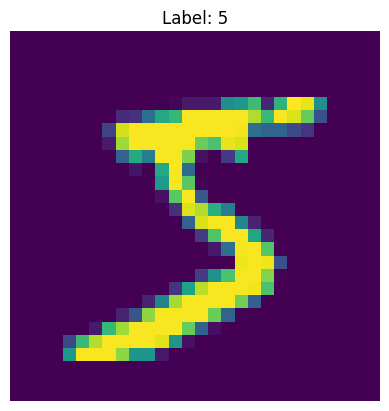

In [ ]:
x_train[0] #ภาพแรก หรือ ตัวอย่างข้อมูลแรก

plt.imshow(x_train[0])  # แสดงภาพแรกในโหมดสีขาวดำ (grayscale) , cmap='gray'
plt.title(f"Label: {y_train[0]}")   # แสดง label ของภาพนั้น
plt.axis('off')
plt.show()

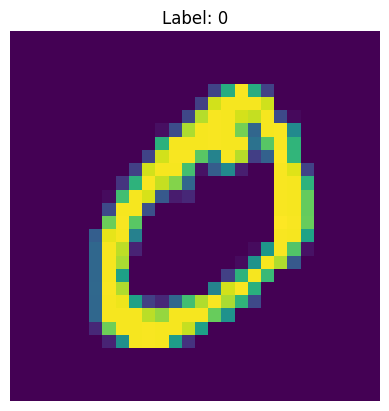

In [ ]:
x_train[1] #ภาพแรก หรือ ตัวอย่างข้อมูลแรก

plt.imshow(x_train[1])  # แสดงภาพที่สองในโหมดสีขาวดำ (grayscale)
plt.title(f"Label: {y_train[1]}")   # แสดง label ของภาพนั้น
plt.axis('off')
plt.show()

In [ ]:
x_train[0] # array 2 มิติ เหมือนมี 28*28 features 784

"""
สมมุติ มีภาพ 28*28

111111111111111111111111111 c1
111111111111111111111111111 c2
111111111111111111111111111 c3
111111111111111111111111111 .
111111111111111111111111111 .
111111111111111111111111111 c28

สิ่งที่มันเก็บ  array 2D
[
 [c1_row],  # แถวที่ 1
 [c2_row],  # แถวที่ 2
 [c3_row],  # แถวที่ 3
 ...
 [c28_row]  # แถวที่ 28
]

แต่เวลานำไป train model จะใช้ array 1D or vector
Flatten คือกระบวนการแปลง array หลายมิติ (multi-dimensional array) ให้กลายเป็น array หนึ่งมิติ (1D array) หรือ vector โดยการเรียงค่าขององค์ประกอบใน array ต้นฉบับมาต่อกันในลำดับที่เหมาะสม

"""

array_2d = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])
print(array_2d)

#หลังแปลง
print("หลังแปลง")

print("flatten")
array_flattened = array_2d.flatten()
print(array_flattened)

print("reshape")
array_reshape = array_2d.reshape(-1)
print(array_reshape)
#ข้อแตกต่างก็คือ reshape มันจะดึงค่าออกมาทำใหม่เลย เพราะฉะนั้นถ้า เราเปลี่ยนแปลงข้อมูล ตัวต้นฉบับก็จะเปลี่ยนตาม | flatten มันจะไม่เปลี่ยนแปลงต้นฉบับ

## [1 2 3 4 5 6] (6,)

# [[1]
#  [2]
#  [3]
#  [4]
#  [5]
#  [6]]
# (6, 1)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
หลังแปลง
flatten
[1 2 3 4 5 6 7 8 9]
reshape
[1 2 3 4 5 6 7 8 9]


In [ ]:
#x_train[0].reshape(-1,1) trying

# เอาภาพเข้า

RGB

In [ ]:
import tensorflow as tf

# โหลดภาพ .jpg
image = tf.keras.utils.load_img("0_0993.jpg", target_size=(256, 256))

# แปลงเป็น NumPy array
image_array = tf.keras.utils.img_to_array(image)
print("Shape:", image_array.shape)  # (28, 28, 1)


Shape: (256, 256, 3)


In [ ]:
image_array

array([[[195., 195., 185.],
        [194., 194., 184.],
        [219., 216., 207.],
        ...,
        [243., 242., 238.],
        [241., 240., 236.],
        [239., 238., 234.]],

       [[191., 191., 181.],
        [191., 191., 181.],
        [218., 215., 206.],
        ...,
        [243., 242., 238.],
        [241., 240., 236.],
        [239., 238., 234.]],

       [[192., 189., 182.],
        [193., 190., 183.],
        [221., 218., 211.],
        ...,
        [243., 242., 238.],
        [241., 240., 236.],
        [239., 238., 234.]],

       ...,

       [[ 32.,  32.,  30.],
        [ 42.,  42.,  40.],
        [ 38.,  38.,  38.],
        ...,
        [ 81.,  90.,  97.],
        [ 82.,  91.,  98.],
        [ 78.,  87.,  94.]],

       [[ 24.,  24.,  22.],
        [ 35.,  35.,  33.],
        [ 37.,  37.,  37.],
        ...,
        [ 73.,  82.,  89.],
        [ 76.,  85.,  92.],
        [ 72.,  81.,  88.]],

       [[ 38.,  38.,  36.],
        [ 27.,  27.,  25.],
        [ 32.,  

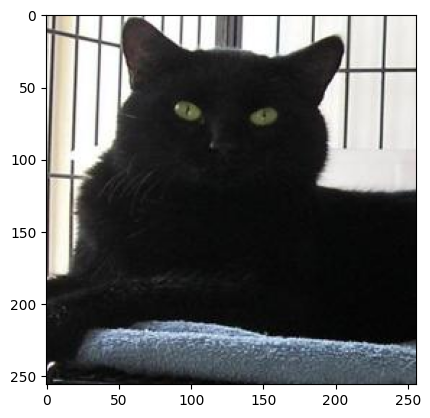

In [ ]:
# แสดงผลภาพในรูปแบบ RGB
plt.imshow(image_array.astype("uint8"))  # แปลงเป็น int เพื่อแสดงผล
plt.show()

In [ ]:
import tensorflow as tf

# โหลดภาพ .jpg
image = tf.keras.utils.load_img("0_0993.jpg",color_mode='grayscale' ,target_size=(28, 28))

# แปลงเป็น NumPy array
image_array = tf.keras.utils.img_to_array(image)
print("Shape:", image_array.shape)  # (28, 28, 1)


Shape: (28, 28, 1)


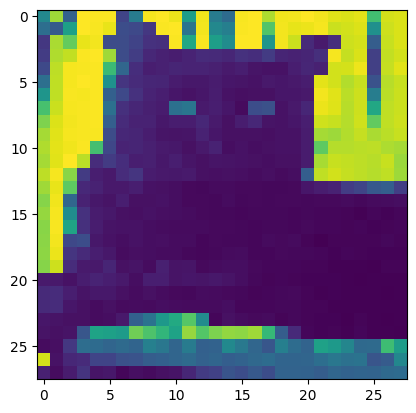

In [ ]:
# แสดงผลภาพในรูปแบบ RGB
plt.imshow(image_array)  # แปลงเป็น int เพื่อแสดงผล
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

# โหลดภาพ .jpg
image = tf.keras.utils.load_img("แมว.jpg",color_mode='grayscale' ,target_size=(64,64))

# แปลงเป็น NumPy array
image_array = tf.keras.utils.img_to_array(image)
print("Shape:", image_array.shape)  # (28, 28, 1)


Shape: (64, 64, 1)


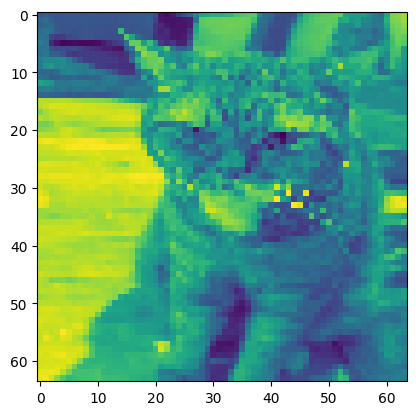

In [ ]:
# แสดงผลภาพในรูปแบบ RGB

plt.imshow(image_array)  # แปลงเป็น int เพื่อแสดงผล
plt.show()

#หลายไฟล์ทำไง

In [ ]:
from google.colab import files

# อัพโหลดไฟล์ .rar
uploaded = files.upload()

Saving cats.rar to cats.rar


In [ ]:
!apt-get install unrar
!unrar x cats.rar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from cats.rar

Creating    cats                                                      OK
Extracting  cats/0_0001.jpg                                                0%  OK 
Extracting  cats/0_0002.jpg                                                0%  OK 
Extracting  cats/0_0003.jpg                                                0%  OK 
Extracting  cats/0_0004.jpg                                                0%  OK 
Extracting  cats/0_0005.jpg                                                0%  OK 
Extracting  cats/0_0006.jpg                                                0%  OK 
Extracting  cats/0_0007.jpg                                    

Shape of all images: (1000, 256, 256, 1)


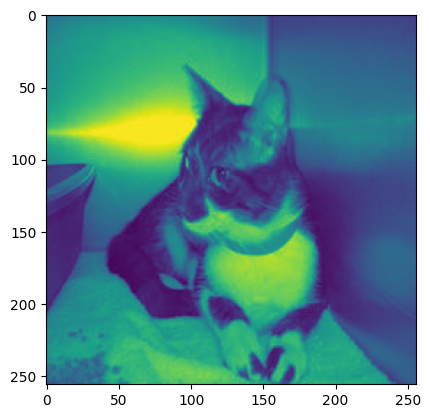

In [ ]:
import os
# โฟลเดอร์ที่เก็บภาพ
image_folder = 'cats'  # เปลี่ยนให้เป็นชื่อโฟลเดอร์ที่คุณแตกไฟล์

# สร้างลิสต์เก็บภาพ
image_list = []

# โหลดภาพจากทุกไฟล์ในโฟลเดอร์
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):  # ตรวจสอบเฉพาะไฟล์ .jpg
        image_path = os.path.join(image_folder, filename)

        # โหลดภาพ .jpg ขนาด 28x28 และแปลงเป็น NumPy array
        image = tf.keras.utils.load_img(image_path, color_mode='grayscale',target_size=(256, 256))

        # แปลงเป็น NumPy array
        image_array = tf.keras.utils.img_to_array(image)

        # ถ้าภาพเป็น grayscale (1 channel) แปลงให้เป็น RGB (3 channel)
        # if image_array.shape[-1] == 1:
        #     image_array = tf.repeat(image_array, 3, axis=-1)

        # เพิ่มภาพลงในลิสต์
        image_list.append(image_array)

# แปลงลิสต์ภาพให้เป็น NumPy array
image_array = np.array(image_list)

# ตรวจสอบขนาดของ array
print("Shape of all images:", image_array.shape)
# แสดงผลภาพแรกในชุดข้อมูล
plt.imshow(image_array[0])
plt.show()

In [ ]:
image_array[0] #ตัวเลข 0 - 255 jpg , png ปกติ

array([[[86.],
        [87.],
        [88.],
        ...,
        [47.],
        [47.],
        [47.]],

       [[89.],
        [90.],
        [91.],
        ...,
        [48.],
        [47.],
        [47.]],

       [[93.],
        [94.],
        [96.],
        ...,
        [49.],
        [48.],
        [48.]],

       ...,

       [[77.],
        [80.],
        [82.],
        ...,
        [77.],
        [76.],
        [76.]],

       [[66.],
        [69.],
        [73.],
        ...,
        [74.],
        [74.],
        [74.]],

       [[65.],
        [68.],
        [69.],
        ...,
        [72.],
        [72.],
        [72.]]], dtype=float32)

In [ ]:
#ทั้งนี้ทั้งนั้น ควรแปลง 0 - 1 ให้


In [ ]:
# แสดงผลภาพในรูปแบบ RGB
import tensorflow as tf

# โหลดภาพ .jpg
image = tf.keras.utils.load_img("แมว.jpg",color_mode='grayscale' ,target_size=(64,64))

# แปลงเป็น NumPy array
image_array = tf.keras.utils.img_to_array(image)
print("Shape:", image_array.shape)  # (28, 28, 1)
image_array = image_array / 255.0

image_array

Shape: (64, 64, 1)


array([[[0.25882354],
        [0.2784314 ],
        [0.25490198],
        ...,
        [0.7411765 ],
        [0.7529412 ],
        [0.78039217]],

       [[0.30980393],
        [0.3372549 ],
        [0.28627452],
        ...,
        [0.73333335],
        [0.74509805],
        [0.78431374]],

       [[0.2901961 ],
        [0.32156864],
        [0.32156864],
        ...,
        [0.70980394],
        [0.73333335],
        [0.7647059 ]],

       ...,

       [[0.85882354],
        [0.8666667 ],
        [0.87058824],
        ...,
        [0.38431373],
        [0.3529412 ],
        [0.34117648]],

       [[0.88235295],
        [0.8862745 ],
        [0.89411765],
        ...,
        [0.36078432],
        [0.38431373],
        [0.40784314]],

       [[0.8901961 ],
        [0.8980392 ],
        [0.85490197],
        ...,
        [0.38431373],
        [0.40392157],
        [0.3882353 ]]], dtype=float32)

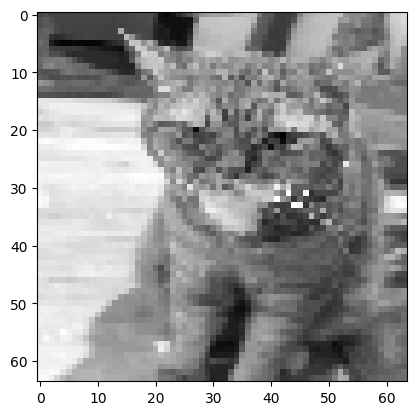

In [ ]:
plt.imshow(image_array , cmap='gray')
plt.show()

In [ ]:
#ภาพยังเหมือนเดิม
"""
Data Augmentation:
ใช้เพิ่มข้อมูลตัวอย่าง เช่น การพลิกภาพ หมุนภาพ หรือยืด/หดภาพ
ลดการ Overfitting และช่วยให้โมเดล generalize ดีขึ้น

"""

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,         # หมุนภาพ
    width_shift_range=0.1,     # เลื่อนแนวนอน
    height_shift_range=0.1,    # เลื่อนแนวตั้ง
    shear_range=0.1,           # เฉือนภาพ
    zoom_range=0.1,            # ซูมเข้า/ออก
    horizontal_flip=True,      # พลิกแนวนอน
    fill_mode='nearest'        # เติมช่องว่างหลังการเปลี่ยนภาพ
)

# ทริคการทำ

In [ ]:
#เช็คข้อมูลที่หาย
try:
    image = Image.open("filename.jpg")
except Exception as e:
    print(f"Error loading image: {e}")

In [ ]:
"""

#Class Balance
-------------------------------------------------------------------------------
(1) Noise ในภาพ
มี noise, จุดรบกวน หรือ artifacts ในภาพหรือไม่?
เช่น ภาพเบลอ หรือมีข้อมูลส่วนเกิน เช่น ข้อความที่ไม่เกี่ยวข้อง
(2) ความชัดเจนของข้อมูล (Quality of Labels)
หากเป็นภาพที่มี label (เช่น "cat", "dog") ให้สุ่มตรวจดูว่า label ตรงกับข้อมูลจริงหรือไม่
-------------------------------------------------------------------------------
Pixel Distribution
ค่าพิกเซลส่วนใหญ่กระจายอยู่ในช่วงใด (เช่น 0-50, 200-255 ฯลฯ)

import numpy as np
import matplotlib.pyplot as plt

pixels = np.array(image)
plt.hist(pixels.ravel(), bins=256, range=(0, 255))
plt.title("Pixel Intensity Distribution")
plt.show()
-------------------------------------------------------------------------------
เป็น Grayscale, RGB หรือ CMYK?
print(image.mode)

-------------------------------------------------------------------------------
ขนาดของภาพเท่ากันทุกอันมั้ย
from PIL import Image
import os

folder = "path_to_images"
for filename in os.listdir(folder):
    if filename.endswith(".jpg"):
        image = Image.open(os.path.join(folder, filename))
        print(f"{filename} size: {image.size}")


"""

In [ ]:
"""
1. Grayscale
คืออะไร:

เป็นภาพขาว-ดำ (Black-and-White) ซึ่งมีเฉดสีเทาระหว่างสีขาว (0%) และสีดำ (100%)
แต่ละพิกเซล จะมีค่าเดียว (Single Channel) ที่แสดงความเข้มของสีเทา (Gray Intensity)
ค่าอยู่ในช่วง 0 ถึง 255 สำหรับภาพ 8-bit
0 = สีดำ
255 = สีขาว
ค่าอื่น ๆ = เฉดสีเทา
การใช้งาน:

ใช้ในงาน Computer Vision ที่ไม่ต้องการข้อมูลสี เช่น การตรวจจับขอบ (edge detection) หรือการประมวลผลภาพเบื้องต้น
ตัวอย่างการแสดงผล:

plaintext
คัดลอก
แก้ไข
0   0   0   255   255   255
0   0   0   255   255   255
0   0   0   255   255   255
(ค่าต่ำคือดำ, ค่าสูงคือขาว)

2. RGB (Red, Green, Blue)
คืออะไร:

ระบบสีที่ใช้รวมสีแดง (Red), เขียว (Green), และน้ำเงิน (Blue) เพื่อสร้างสีที่มองเห็นได้ในภาพ
เป็นรูปแบบที่ใช้ทั่วไปในหน้าจอคอมพิวเตอร์, ทีวี, และกล้องดิจิทัล
แต่ละพิกเซล จะมีค่าใน 3 ช่อง (3 Channels: R, G, B) ซึ่งแต่ละช่องมีค่าระหว่าง 0 ถึง 255
การทำงาน:

สีที่มองเห็นในแต่ละพิกเซลคือผลรวมของค่าความเข้มในช่อง R, G, และ B
ตัวอย่าง:
(255, 0, 0) = สีแดง
(0, 255, 0) = สีเขียว
(0, 0, 255) = สีน้ำเงิน
(255, 255, 255) = สีขาว
(0, 0, 0) = สีดำ
การใช้งาน:

ใช้สำหรับการแสดงผลภาพสี เช่น ภาพถ่ายหรือภาพกราฟิก
ตัวอย่างการแสดงผล (1 พิกเซล):

plaintext
คัดลอก
แก้ไข
R: 128, G: 64, B: 255
(เป็นการรวมสีให้กลายเป็นสีเฉพาะ)

3. CMYK (Cyan, Magenta, Yellow, Black)
คืออะไร:

ระบบสีที่ใช้ในงานพิมพ์ (Printing) เช่น เครื่องพิมพ์และงานสิ่งพิมพ์
ใช้แม่สี 4 สี: Cyan (ฟ้า), Magenta (ชมพู), Yellow (เหลือง), และ Black (ดำ)
แต่ละพิกเซลจะมีค่าใน 4 ช่อง (4 Channels: C, M, Y, K)
การทำงาน:

ใช้การลดแสง (Subtractive Color Model): สีแต่ละช่องทำหน้าที่ดูดซับแสง เพื่อแสดงผลรวมเป็นสีที่ต้องการ
ตัวอย่าง:
(0, 0, 0, 0) = ไม่มีสี (กระดาษขาว)
(0, 0, 0, 1) = สีดำสนิท
(1, 0, 0, 0) = สีฟ้าเต็ม
การใช้งาน:

ใช้ในงานพิมพ์เพื่อแสดงสีได้ใกล้เคียงกับความเป็นจริงที่สุด

"""

การครอบภาพ (Cropping) ก็จำเป็น
